# Compare machine learning classification models `by breast cancer`.

## introduction
This project aims to enable early detection of breast cancer using laboratory analyzes and the performance of several machine learning models in the classification task was compared. The dataset used in this project contains medical data containing 32 features and 569 rows, representing different measurements related to breast cancer diagnosis. The goal is to predict whether a tumor is **malignant (M)** or **benign (B)** based on selected features.

Machine learning models are evaluated using several key performance metrics to evaluate their effectiveness. These models include:

- Logistic regression
- Support Vector Machine (SVM)
- Decision tree
- Random forest
- K-nearest neighbors (KNN)
- Naive Bayes
- Gradient Boosting

## Project goal
The primary goal of this project is to identify the best performing classification model based on evaluation metrics such as precision, precision, recall, F1 score, ROC AUC, and other statistical measurements. These metrics provide insight into the strengths and weaknesses of each paradigm for the binary classification task at hand.

## Dataset
The dataset used for this project is a CSV file containing the following basic information:
- **Features**: 32 digital features related to breast cancer diagnosis.
- **Goal**: A binary goal variable representing the diagnosis of the tumor (malignant or benign).

Data preprocessing steps included handling missing values, removing outliers using the interquartile range (IQR) method, and coding categorical variables using one-hot coding techniques.

## Evaluation metrics
To evaluate the performance of each model, the following evaluation metrics were used:
- **Accuracy**: The ratio of correctly predicted instances to total instances.
- **Accuracy**: The ratio of true positive expectations to total positive expectations.
- **Reminder**: The ratio of true positive expectations to total actual positive cases.
- **F1-Score**: The harmonic mean of accuracy and recall.
- **ROC AUC**: The area under the receiver operating characteristic curve, which provides a measure of the model's ability to discriminate between classes.
- **Confusion Matrix**: A matrix that provides a summary of prediction results, indicating true positives, true negatives, false positives, and false negatives.
- **Matthews Correlation Coefficient (MCC)**: A measure of the quality of binary ratings, ranging from -1 to +1.
- **LogLoss**: A measure that evaluates the probability estimates of the classifier.

# Call library

In [1]:
# Basic
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Alagorithms Machine Learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

# Evaluation Metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix, matthews_corrcoef, log_loss

# Preprocessing 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler

# Logging
import logging
# Setup logging
logging.basicConfig(filename='/kaggle/working/model_evaluation.log', level=logging.INFO, 
                    format='%(asctime)s - %(levelname)s - %(message)s')


# Exploratory Data Analysis (EDA) 


To perform a full Exploratory Data Analysis (EDA) on the given breast cancer dataset, we'll go through the following steps:

1. **Loading the Data**: Load the CSV file and inspect its structure.
2. **Data Overview**: Display information about the dataset, including data types, null values, and basic statistics.
3. **Target Variable Analysis**: Analyze the distribution of the target variable (`diagnosis`).
4. **Feature Analysis**: Perform univariate and bivariate analysis for numerical features.
5. **Correlation Analysis**: Check for correlations between features.
6. **Feature Distribution**: Visualize the distribution of the most significant features.
7. **Data Cleaning**: Check for missing values or any data cleaning required.
8. **Pairplot and Heatmap**: Visualize relationships between features using pairplots and heatmaps.

Here's a detailed  script to perform the full EDA:





### Load the dataset

In [2]:
data = pd.read_csv("/kaggle/input/breast-cancer-dataset/breast-cancer.csv")

### Basic Overview of the Dataset

In [3]:
print("Dataset Shape:", data.shape)
print("\nFirst 5 Rows of the Dataset:\n", data.head())
print("\nData Info:\n")
data.info()

Dataset Shape: (569, 32)

First 5 Rows of the Dataset:
          id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...

### Statistical Summary

In [4]:
print("\nStatistical Summary:\n")
data.describe()


Statistical Summary:



,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


### Checking for Missing Values

In [5]:
print("\nMissing Values in Each Column:\n", data.isnull().sum())


Missing Values in Each Column:
 id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64


### Target Variable Analysis


Target Variable Distribution:
 diagnosis
B    357
M    212
Name: count, dtype: int64


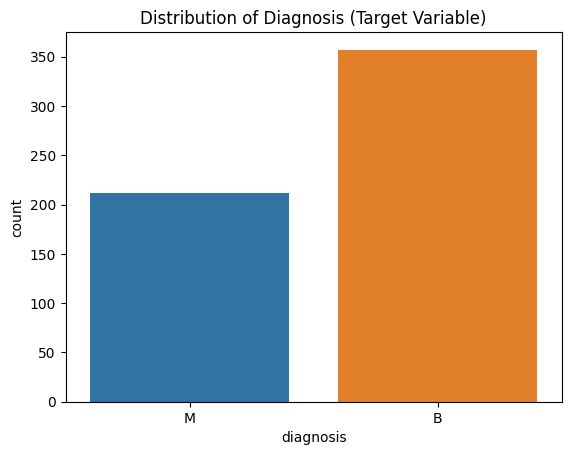

In [6]:
print("\nTarget Variable Distribution:\n", data['diagnosis'].value_counts())
sns.countplot(x='diagnosis', data=data)
plt.title('Distribution of Diagnosis (Target Variable)')
plt.show()

### Feature Analysis (Univaiate)

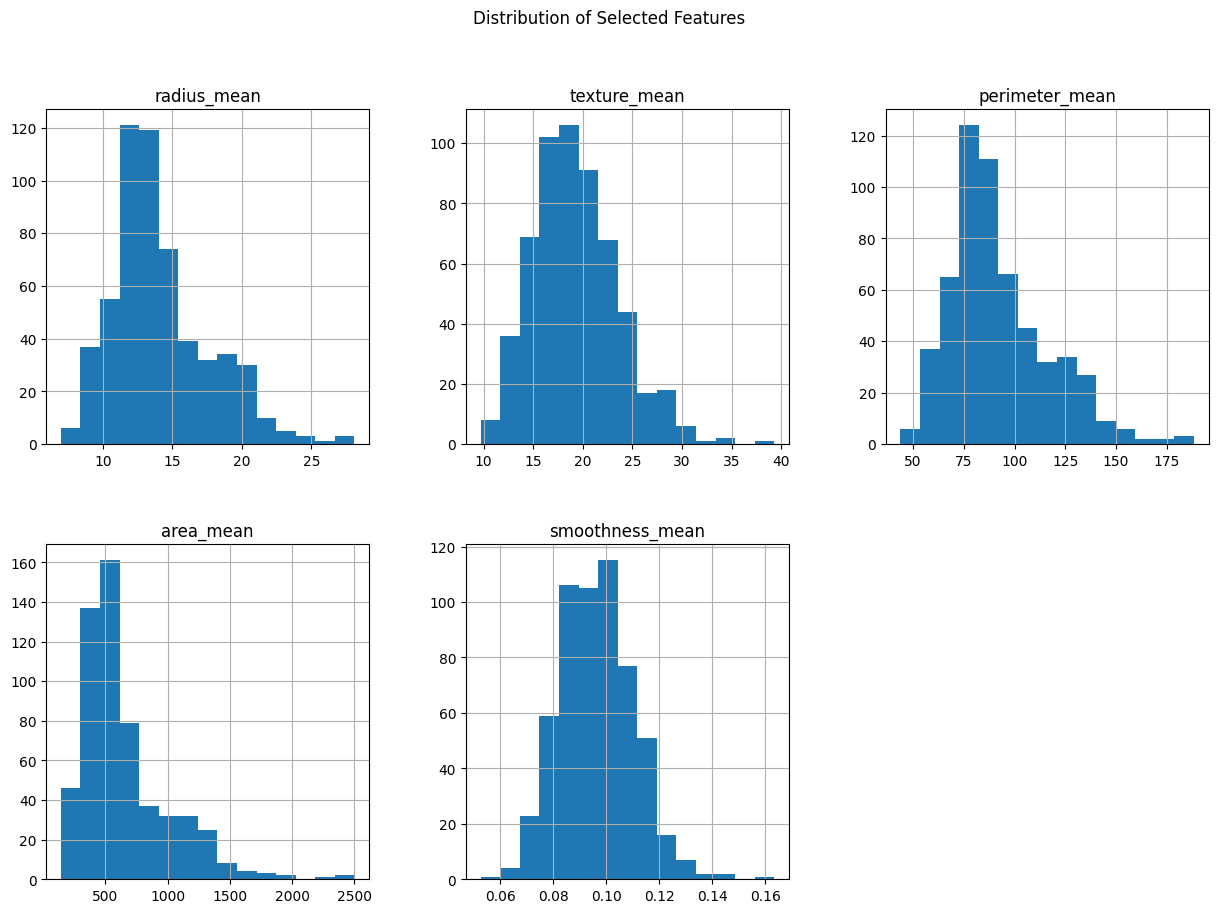

In [7]:
# Histogram of some selected features
features = ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean']
data[features].hist(bins=15, figsize=(15, 10), layout=(2, 3))
plt.suptitle('Distribution of Selected Features')
plt.show()

### Feature Correlation (Bivariate)


In [ ]:
# Correlation matrix
numerical_data = data.select_dtypes(include=['float64', 'int64'])  # Select only numerical columns
correlation_matrix = numerical_data.corr()

# Visualizing the correlation matrix using a heatmap
plt.figure(figsize=(18, 15))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

### Pairplot for relationships between selected features


In [ ]:
# Suppress specific warnings
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)


selected_features = ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'diagnosis']
sns.pairplot(data[selected_features], hue='diagnosis')
plt.title('Pairplot of Selected Features')
plt.show()

### Checking Feature Distribution with respect to Diagnosis


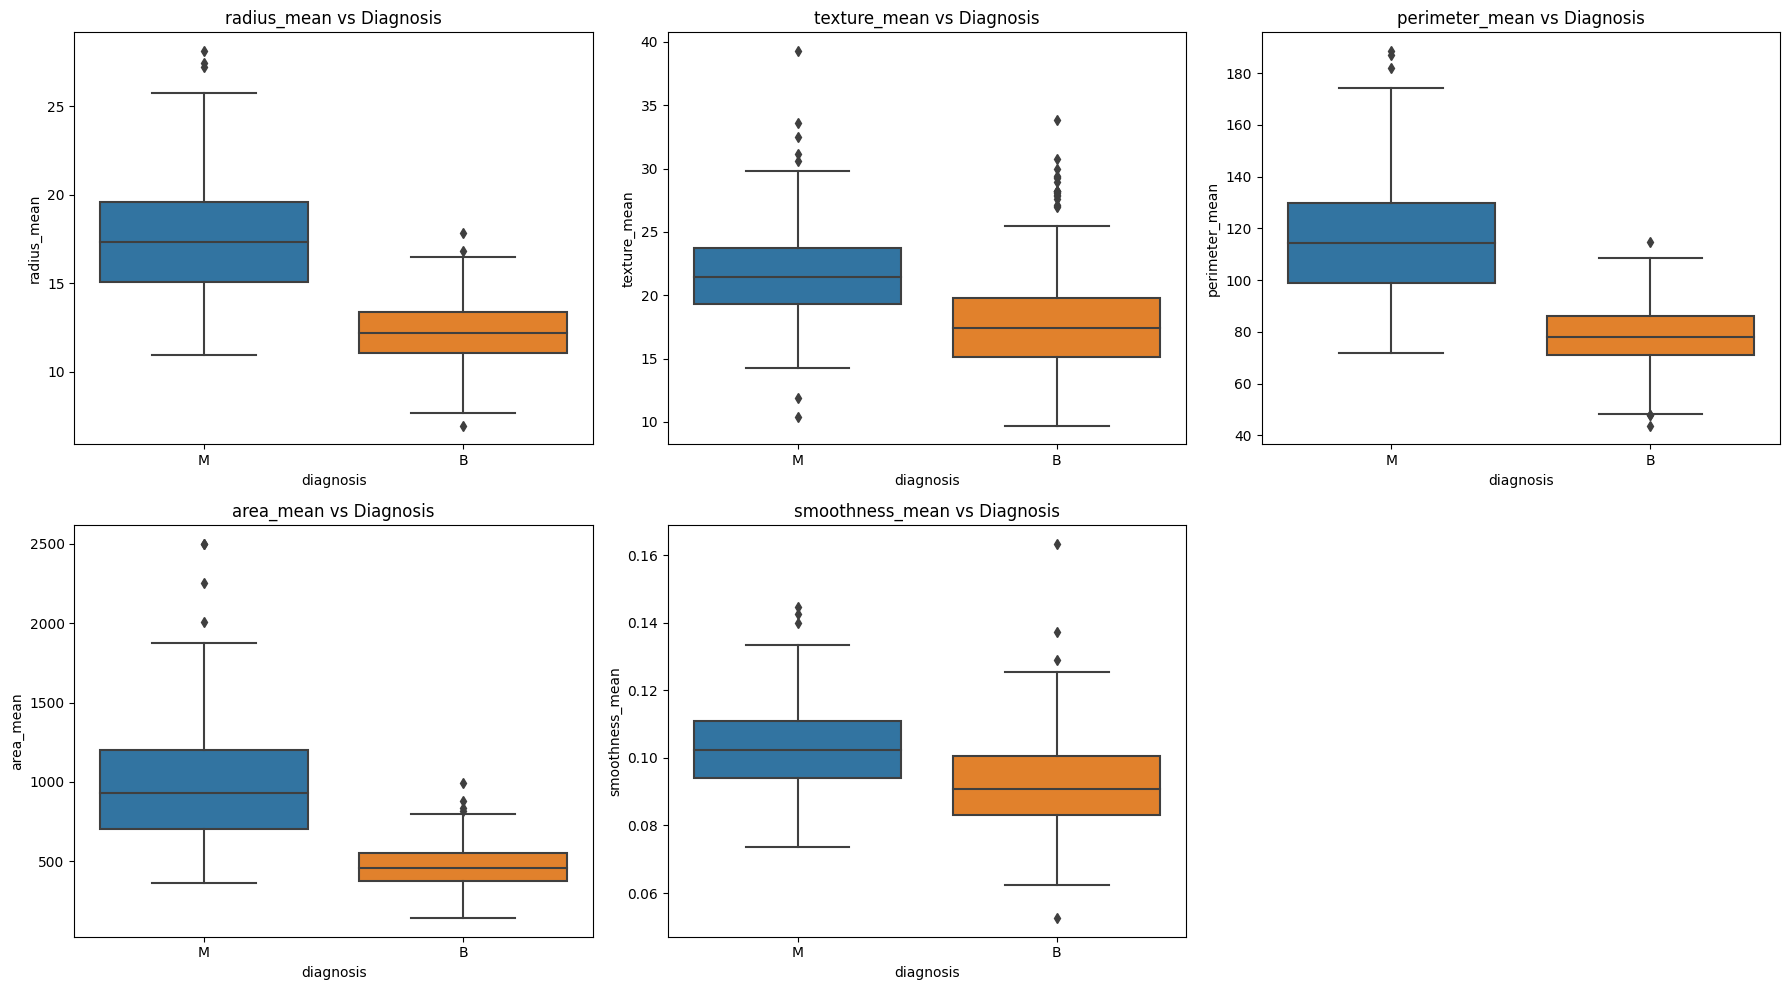

In [10]:
# Boxplot for continuous features based on diagnosis
plt.figure(figsize=(18, 10))
for i, feature in enumerate(features):
    plt.subplot(2, 3, i+1)
    sns.boxplot(x='diagnosis', y=feature, data=data)
    plt.title(f'{feature} vs Diagnosis')
plt.tight_layout()
plt.show()

### Further Detailed Feature Analysis: Worst Features


In [ ]:
worst_features = ['radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 
                  'smoothness_worst', 'compactness_worst', 'concavity_worst', 
                  'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']

# Histograms of worst features
data[worst_features].hist(bins=15, figsize=(15, 10), layout=(3, 4))
plt.suptitle('Distribution of Worst Features')
plt.show()

### Pairplot of Worst Features

In [ ]:
sns.pairplot(data[worst_features + ['diagnosis']], hue='diagnosis')
plt.title('Pairplot of Worst Features')
plt.show()

### Data Cleaning

In [ ]:
# Checking for duplicates
duplicates = data.duplicated().sum()
print(f"\nNumber of Duplicate Rows: {duplicates}")

### Remove outliers using the Interquartile Range (IQR) method for each numerical column in dataset.

1. **Calculate the IQR**: For each numerical column, calculate the 1st quartile (Q1) and the 3rd quartile (Q3), then compute the IQR as `IQR = Q3 - Q1`.

2. **Define the Outlier Boundaries**: Typically, outliers are considered to be data points that lie below `Q1 - 1.5 * IQR` or above `Q3 + 1.5 * IQR`.

3. **Filter Out the Outliers**: Remove rows where any numerical feature has a value outside these boundaries.

#### Code to Remove Outliers using IQR

In [ ]:
# Functuon to remove outliers based on IQR
def remove_outliers_iqr(df: pd.DataFrame) -> pd.DataFrame:
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    
    # Filtering the data to remove outliers
    df_clean = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]
    return df_clean

# Apply the function to remove outliers from the numerical columns
data_cleaned = remove_outliers_iqr(numerical_data)

# If you want to keep non-numerical columns after removing outliers:
non_numerical_data = data.select_dtypes(exclude=['float64', 'int64'])
data_cleaned = pd.concat([data_cleaned, non_numerical_data], axis=1)

print(data_cleaned.shape)

### Explanation:

1. **`numerical_data = data.select_dtypes(include=['float64', 'int64'])`**: This selects only the numerical columns from the dataset.

2. **`remove_outliers_iqr()`**: This function calculates the IQR for each numerical column, defines the outlier boundaries, and filters out rows containing outliers in any numerical column.

3. **`df_clean = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]`**: This line keeps rows that do not contain outliers in any numerical column.

4. **Handling Non-Numerical Data**: If your dataset contains non-numerical columns that you want to keep, the code concatenates the cleaned numerical data with the non-numerical columns after removing the outliers.

### Notes:
- **Adjusting the IQR Multiplier**: The multiplier `1.5` can be adjusted depending on how strict you want the outlier detection to be.
- **Impact on Dataset**: After removing outliers, you may want to check the new shape of the dataset to understand the impact on the number of rows.

### Explanation of the Steps:

1. **Loading the Data**: The dataset is loaded using `pd.read_csv()`, and basic details are displayed.
2. **Data Overview**: `data.info()` provides insights into data types, non-null values, etc. `data.describe()` shows statistical summaries.
3. **Missing Values**: We check for any missing values in the dataset.
4. **Target Variable Analysis**: We analyze the distribution of the target variable `diagnosis` using a count plot.
5. **Feature Analysis**: Univariate analysis of features through histograms and statistical summaries.
6. **Correlation Analysis**: The correlation matrix helps identify relationships between features, visualized using a heatmap.
7. **Feature Distribution**: Distribution of selected features with respect to the `diagnosis` column using boxplots.
8. **Worst Features**: We analyze the worst features (e.g., `radius_worst`, `area_worst`) through histograms and pairplots.
9. **Data Cleaning**: Duplicate rows and missing values are checked.

# Full preprocessing pipeline
1. **Handling Categorical Variables**: We will use `LabelEncoder` for columns with more than 7 unique categories and `OneHotEncoder` for columns with fewer than 7 unique categories.
2. **Scaling Numerical Variables**: We will scale numerical features using `MinMaxScaler` to bring them to a common scale.
3. **Handling Missing Values**: If there are any missing values, we will handle them appropriately (imputation).
4. **Splitting the Data**: Finally, we will split the data into training and testing sets.

### Drop the 'id' column from the features

In [ ]:
data = data.drop(columns=['id'])

# Verify the updated columns
print("Updated columns in data:", data.columns)

### Handle Missing Values
Note: I Don't have.

In [ ]:
# # Impute missing numerical values with the mean
# num_imputer = SimpleImputer(strategy='mean')

# # Impute missing categorical values with the most frequent value
# cat_imputer = SimpleImputer(strategy='most_frequent')

### One-Hot Encoding using OneHotEncoder 
`Target: M - Malignant B - Benign`

In [ ]:
# Replace 'M' with 1 and 'B' with 0
data['diagnosis'] = data['diagnosis'].map({'M': 1, 'B': 0})

# Check the updated DataFrame
print(data['diagnosis'].head())

### Split the dataset into features (X) and target (y)

In [ ]:
X = data.drop("diagnosis", axis=1)  # Assuming "diagnosis" is the target column
y = data["diagnosis"]

### Splitting the Data into Train and Test sets

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Print columns in X_train to verify
print("Columns in X_train:", X_train.columns)

### Scaling Numerical Features

In [ ]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Explanation of the Steps:

1. **Identify Categorical and Numerical Columns**: The dataset is split into categorical and numerical columns using `select_dtypes()`.
2. **Encoding Categorical Variables**: 
   - `LabelEncoder` is used for columns with more than 7 unique categories.
   - `OneHotEncoder` is used for columns with 7 or fewer unique categories.
3. **Handle Missing Values**: 
   - For numerical columns, missing values are imputed with the mean.
   - For categorical columns, missing values are imputed with the most frequent value.
4. **Scaling Numerical Features**: We use `MinMaxScaler` to scale all numerical features to a range of 0 to 1.
5. **Preprocessing Pipeline**: The pipeline includes imputation and scaling for numerical features, and imputation and encoding for categorical features.
6. **Data Splitting**: The data is split into training and testing sets using `train_test_split()`.
7. **Target Variable Encoding**: The target variable `diagnosis` is encoded using `One-Hot Encoder`.

### Notes:
- **Feature Selection**: You can apply feature selection techniques if the dataset has many features, or if some features show a high correlation with others.
- **Outlier Detection**: Depending on the distribution of your data, consider adding outlier detection and handling steps.
- **Handling Class Imbalance**: If the target variable is imbalanced, techniques like oversampling (SMOTE) or undersampling might be necessary.

# Machine Learning Models

#### Below is a list of common machine learning models used for classification tasks, grouped by categories such as linear models, tree-based models, ensemble models, etc. For each model, I will provide a brief explanation and some notes on when to use it.

### 1. **Linear Models**
   - **Logistic Regression**:
     - **Description**: A linear model that estimates the probability of a binary outcome using the logistic function.
     - **When to Use**: Works well for linearly separable data; interpretable and fast.
   
   - **Linear Discriminant Analysis (LDA)**:
     - **Description**: Assumes that the data follows a Gaussian distribution and maximizes the separation between classes.
     - **When to Use**: Useful when the assumptions of normality are met, and the data is linearly separable.

   - **Ridge Classifier**:
     - **Description**: A variant of logistic regression with L2 regularization to prevent overfitting.
     - **When to Use**: Useful when dealing with multicollinearity or noisy data.

### 2. **Tree-Based Models**
   - **Decision Trees**:
     - **Description**: A non-linear model that splits the data into subsets using decision rules based on features.
     - **When to Use**: Good for both binary and multiclass classification; can capture complex relationships but may overfit on small datasets.
   
   - **Random Forest**:
     - **Description**: An ensemble of decision trees where each tree is trained on a random subset of features and samples.
     - **When to Use**: Reduces overfitting compared to a single decision tree and performs well on a variety of data.

   - **Gradient Boosting Machines (GBM)**:
     - **Description**: Builds decision trees sequentially, where each tree tries to correct the errors of the previous one.
     - **When to Use**: High accuracy and robustness, but may require careful tuning of hyperparameters.

   - **XGBoost**:
     - **Description**: An optimized implementation of gradient boosting that is faster and more efficient.
     - **When to Use**: When you need a fast, accurate model with good handling of missing data.

   - **LightGBM**:
     - **Description**: A gradient boosting framework that uses a histogram-based approach for faster training and better memory usage.
     - **When to Use**: Best suited for large datasets with a high number of features.

   - **CatBoost**:
     - **Description**: A gradient boosting algorithm that handles categorical variables more effectively.
     - **When to Use**: When you have categorical features and want to avoid heavy preprocessing.

### 3. **Ensemble Methods**
   - **AdaBoost**:
     - **Description**: Combines weak learners (typically decision trees) to create a strong classifier by iteratively adjusting the weights of misclassified samples.
     - **When to Use**: Good for handling imbalanced data and improving accuracy.
   
   - **Voting Classifier**:
     - **Description**: Combines predictions from multiple models (e.g., logistic regression, decision tree, SVM) by voting (majority or weighted).
     - **When to Use**: When you want to combine the strengths of multiple models for improved performance.

   - **Bagging Classifier**:
     - **Description**: Uses bootstrapping to train multiple models (e.g., decision trees) on random subsets of the data and averages their predictions.
     - **When to Use**: Reduces overfitting and variance compared to individual models.

### 4. **Support Vector Machines (SVM)**
   - **Support Vector Classifier (SVC)**:
     - **Description**: A linear or non-linear classifier that tries to maximize the margin between classes.
     - **When to Use**: Works well for small to medium-sized datasets with a clear margin of separation.

### 5. **K-Nearest Neighbors (KNN)**
   - **K-Nearest Neighbors**:
     - **Description**: A non-parametric model that classifies data points based on the majority class of their nearest neighbors.
     - **When to Use**: Simple and effective for small datasets; struggles with large or high-dimensional data.

### 6. **Naive Bayes**
   - **Gaussian Naive Bayes**:
     - **Description**: Assumes that features are normally distributed and independent given the class label.
     - **When to Use**: Very fast and works well with small datasets; performs well with high-dimensional data.
   
   - **Multinomial Naive Bayes**:
     - **Description**: Suitable for discrete data, commonly used for text classification problems.
     - **When to Use**: Best for text classification tasks (e.g., spam detection).

   - **Bernoulli Naive Bayes**:
     - **Description**: Designed for binary/boolean features.
     - **When to Use**: When your features are binary, such as in text classification with presence/absence of words.

### 7. **Neural Networks**
   - **Multi-Layer Perceptron (MLP)**:
     - **Description**: A feedforward neural network with one or more hidden layers.
     - **When to Use**: Suitable for both binary and multiclass classification, particularly for large datasets with complex patterns.
   
   - **Convolutional Neural Networks (CNN)**:
     - **Description**: A neural network architecture designed for spatial data (e.g., images).
     - **When to Use**: Primarily used for image classification tasks.

   - **Recurrent Neural Networks (RNN)**:
     - **Description**: A neural network architecture designed for sequential data (e.g., time series, text).
     - **When to Use**: Best suited for sequence classification tasks like sentiment analysis.

### 8. **Probabilistic Models**
   - **Gaussian Process Classifier**:
     - **Description**: A non-parametric model that provides a probabilistic approach to classification by modeling the data as a Gaussian distribution.
     - **When to Use**: Effective when you need uncertainty estimation along with predictions.

### 9. **Others**
   - **Extreme Learning Machines (ELM)**:
     - **Description**: A type of feedforward neural network that provides fast training by randomly assigning weights and biases.
     - **When to Use**: Suitable for real-time applications requiring fast model training.

   - **Quadratic Discriminant Analysis (QDA)**:
     - **Description**: Similar to LDA but allows for each class to have its own covariance matrix.
     - **When to Use**: When the assumption of shared covariance (as in LDA) does not hold.

### Considerations:
- **Model Selection**: The choice of model depends on your dataset size, feature types, and the complexity of the decision boundaries.
- **Performance Tuning**: Most models require tuning of hyperparameters (e.g., regularization strength, tree depth, learning rate) to achieve optimal performance.
- **Evaluation**: Always use proper evaluation metrics (e.g., accuracy, precision, recall, F1-score, AUC) and cross-validation to assess your model’s performance.

In [22]:
import joblib  # or import pickle

# Initialize classifiers
models = {
    'Logistic Regression': LogisticRegression(),
    'Support Vector Machine': SVC(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB(),
    'Gradient Boosting': GradientBoostingClassifier()
}

# Train, evaluate, and save each model
for model_name, model in models.items():
    print(f"\nTraining {model_name}...")
    model.fit(X_train_scaled, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test_scaled)
    y_pred_proba = model.predict_proba(X_test_scaled)[:, 1] if hasattr(model, "predict_proba") else None
    
    # Evaluation Metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_proba) if y_pred_proba is not None else 'N/A'
    conf_matrix = confusion_matrix(y_test, y_pred)
    mcc = matthews_corrcoef(y_test, y_pred)
    log_loss_value = log_loss(y_test, y_pred_proba) if y_pred_proba is not None else 'N/A'
    
    # Format output for professional display
    metrics_output = (
        f"\nModel: {model_name}\n"
        f"{'-'*40}\n"
        f"Accuracy: {accuracy:.4f}\n"
        f"Precision: {precision:.4f}\n"
        f"Recall: {recall:.4f}\n"
        f"F1-Score: {f1:.4f}\n"
        f"ROC AUC: {roc_auc}\n"
        f"Confusion Matrix:\n{conf_matrix}\n"
        f"Matthews Correlation Coefficient: {mcc:.4f}\n"
        f"Log Loss: {log_loss_value}\n"
        f"{'-'*40}\n"
    )
    
    # Log metrics to file
    logging.info(metrics_output)
    
    # Print to console
    print(metrics_output)
    
    # Save the model
    model_filename = f"{model_name.replace(' ', '_').replace('-', '_').lower()}.pkl"
    joblib.dump(model, model_filename)  # or use pickle.dump(model, open(model_filename, 'wb'))
    print(f"Saved {model_name} to {model_filename}")



Model: Gradient Boosting
----------------------------------------
Accuracy: 0.9561
Precision: 0.9524
Recall: 0.9302
F1-Score: 0.9412
ROC AUC: 0.9950867998689813
Confusion Matrix:
[[69  2]
 [ 3 40]]
Matthews Correlation Coefficient: 0.9064
Log Loss: 0.11219592874526173
----------------------------------------

Saved Gradient Boosting to gradient_boosting.pkl


## Model Evaluation Results

### Logistic Regression
----------------------------------------
- **Accuracy**: 0.9825
- **Precision**: 1.0000
- **Recall**: 0.9535
- **F1-Score**: 0.9762
- **ROC AUC**: 0.9980
- **Confusion Matrix**:
  ```
  [[71  0]
   [ 2 41]]
  ```
- **Matthews Correlation Coefficient**: 0.9630
- **Log Loss**: 0.1181
----------------------------------------

### Support Vector Machine
----------------------------------------
- **Accuracy**: 0.9737
- **Precision**: 0.9762
- **Recall**: 0.9535
- **F1-Score**: 0.9647
- **ROC AUC**: N/A
- **Confusion Matrix**:
  ```
  [[70  1]
   [ 2 41]]
  ```
- **Matthews Correlation Coefficient**: 0.9439
- **Log Loss**: N/A
----------------------------------------

### Decision Tree
----------------------------------------
- **Accuracy**: 0.9298
- **Precision**: 0.8889
- **Recall**: 0.9302
- **F1-Score**: 0.9091
- **ROC AUC**: 0.9299
- **Confusion Matrix**:
  ```
  [[66  5]
   [ 3 40]]
  ```
- **Matthews Correlation Coefficient**: 0.8526
- **Log Loss**: 2.5294
----------------------------------------

### Random Forest
----------------------------------------
- **Accuracy**: 0.9649
- **Precision**: 0.9756
- **Recall**: 0.9302
- **F1-Score**: 0.9524
- **ROC AUC**: 0.9972
- **Confusion Matrix**:
  ```
  [[70  1]
   [ 3 40]]
  ```
- **Matthews Correlation Coefficient**: 0.9253
- **Log Loss**: 0.0906
----------------------------------------

### K-Nearest Neighbors
----------------------------------------
- **Accuracy**: 0.9649
- **Precision**: 0.9535
- **Recall**: 0.9535
- **F1-Score**: 0.9535
- **ROC AUC**: 0.9836
- **Confusion Matrix**:
  ```
  [[69  2]
   [ 2 41]]
  ```
- **Matthews Correlation Coefficient**: 0.9253
- **Log Loss**: 0.3849
----------------------------------------

### Naive Bayes
----------------------------------------
- **Accuracy**: 0.9649
- **Precision**: 0.9756
- **Recall**: 0.9302
- **F1-Score**: 0.9524
- **ROC AUC**: 0.9974
- **Confusion Matrix**:
  ```
  [[70  1]
   [ 3 40]]
  ```
- **Matthews Correlation Coefficient**: 0.9253
- **Log Loss**: 0.2051
----------------------------------------

### Gradient Boosting
----------------------------------------
- **Accuracy**: 0.9561
- **Precision**: 0.9524
- **Recall**: 0.9302
- **F1-Score**: 0.9412
- **ROC AUC**: 0.9951
- **Confusion Matrix**:
  ```
  [[69  2]
   [ 3 40]]
  ```
- **Matthews Correlation Coefficient**: 0.9064
- **Log Loss**: 0.1119
----------------------------------------

## Conclusion
Comparing multiple machine learning models in this project allows us to choose the most appropriate model for the specific classification problem. By analyzing various evaluation metrics, the project provides valuable insights into the model's performance and helps identify areas that need further improvement.